In [1]:
!pip install pandas
!pip install numpy

In [2]:
import pandas as pd
import numpy as np


In [3]:
df_train=pd.read_csv('DataSet/sign_mnist_train.csv')
df_test=pd.read_csv('DataSet/sign_mnist_test.csv')
y_train=df_train['label'].values
y_test=df_test['label'].values
df_train.drop('label',axis=1,inplace=True)
df_test.drop('label',axis=1,inplace=True)
df_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
x_train=df_train.values
x_test=df_test.values
unique_val = np.array(y_train)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [5]:
x_train=np.array(x_train.reshape(-1,28,28,1))
x_test=np.array(x_test.reshape(-1,28,28,1))

In [6]:
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
!pip install sklearn

In [8]:
from sklearn.preprocessing import LabelBinarizer
lb_train= LabelBinarizer()
lb_test=LabelBinarizer()
y_train=lb_train.fit_transform(y_train)
y_test=lb_test.fit_transform(y_test)

In [9]:
print(y_train)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [10]:
!pip install matplotlib

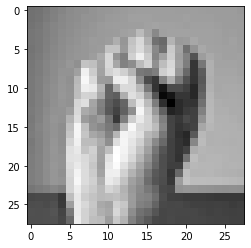

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10].reshape(28,28),cmap='gray')

In [12]:
x_train=x_train/255
x_test=x_test/255

In [15]:
!pip install keras==2.6.0

  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires clang~=5.0, but you have clang 14.0 which is incompatible.
tensorflow 2.6.0 requires flatbuffers~=1.12, but you have flatbuffers 20210226132247 which is incompatible.


In [16]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPooling2D


In [17]:
batch_size = 128
num_classes = 24
epochs = 100


In [18]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [19]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/100


AttributeError: in user code:

    C:\Users\Vishesh\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\Vishesh\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Vishesh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Vishesh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Vishesh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Vishesh\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\Vishesh\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:791 train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    C:\Users\Vishesh\anaconda3\envs\tf\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:522 minimize
        return self.apply_gradients(grads_and_vars, name=name)
    C:\Users\Vishesh\anaconda3\envs\tf\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:655 apply_gradients
        grads_and_vars = self._aggregate_gradients(grads_and_vars)
    C:\Users\Vishesh\anaconda3\envs\tf\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:474 _aggregate_gradients
        return self.gradient_aggregator(grads_and_vars)
    C:\Users\Vishesh\anaconda3\envs\tf\lib\site-packages\keras\optimizer_v2\utils.py:33 all_reduce_sum_gradients
        if strategy_supports_no_merge_call():

    AttributeError: module 'tensorflow.compat.v2.__internal__.distribute' has no attribute 'strategy_supports_no_merge_call'
